# Question 1:
### Make a 9x9 numpy array filled with the repeating pattern 1,2,3,1,2,3,...

In [7]:
# Answer 1
import numpy as np
x = np.zeros((9,9))
for i in range(0,9) :
    for j in range(0,9) :
        x[i][j] = 1 + (j%3)
print(x)

[[1. 2. 3. 1. 2. 3. 1. 2. 3.]
 [1. 2. 3. 1. 2. 3. 1. 2. 3.]
 [1. 2. 3. 1. 2. 3. 1. 2. 3.]
 [1. 2. 3. 1. 2. 3. 1. 2. 3.]
 [1. 2. 3. 1. 2. 3. 1. 2. 3.]
 [1. 2. 3. 1. 2. 3. 1. 2. 3.]
 [1. 2. 3. 1. 2. 3. 1. 2. 3.]
 [1. 2. 3. 1. 2. 3. 1. 2. 3.]
 [1. 2. 3. 1. 2. 3. 1. 2. 3.]]


# Question 2:
### Write a function that performs min-max scaling on a numpy array across rows 

## Example:

### Input 
$\begin{bmatrix}1& 2& 3\\10 & 15 & 20 \\ -5 & -11&  9\end{bmatrix}$
    
### Output
$\begin{bmatrix} 0 & 0.5 & 1 \\ 0 & 0.5 & 1 \\ 0.3 & 0 & 1 \end{bmatrix}$


In [19]:
# Answer 2 - using for loops
import numpy as np

def scalingWithFor() :
    arr = np.array([[1,2,3],[10,15,20],[-5,-11,9]]) 
    brr = np.empty_like(arr, dtype = np.float64)
    for i in range(np.size(arr,0)) :
        minimum = min(arr[i])
        maximum = max(arr[i])
        for j in range(np.size(arr,1)) :
            brr[i][j] = (arr[i][j] - minimum)/(maximum-minimum)
    print(brr)
    
scalingWithFor()

[[0.  0.5 1. ]
 [0.  0.5 1. ]
 [0.3 0.  1. ]]


In [37]:
# Answer 2 - without using for loops
import numpy as np

def scalingWithoutFor(arr) :
    brr = np.empty_like(arr, dtype = np.float64)
    minimum = arr.min(axis=1).reshape(len(arr),1)
    maximum = arr.max(axis=1).reshape(len(arr),1)
    brr = (arr - minimum)/(maximum - minimum)
    print(brr)
    
arr = np.array([[1,2,3],[10,15,20],[-5,-11,9]])
scalingWithoutFor(arr)

[[0.  0.5 1. ]
 [0.  0.5 1. ]
 [0.3 0.  1. ]]


# Question 3:
### Find index of the element of the array which is closest to a given value

## Example:

### Input 
$\begin{bmatrix}4.5& -5& 83\\5.11 & 5.25 & 20 \\ -5 & 42&  69.99\end{bmatrix}$
    
val = 5

### Output

index = (1, 0)


In [26]:
# Answer 3 - using for loops
import numpy as np

def closest(arr,value) :
    brr = arr - value
    brr = np.absolute(brr)
    min = brr[0][0]
    n=0
    m=0
    for i in range(np.size(brr,0)) :
        for j in range(np.size(arr,1)) :
            if(brr[i][j]<min) :
                min = brr[i][j]
                n=i
                m=j
    print(f"index = ({n},{m})")
    
x = np.array([[4.5,-5,83],[5.11,5.25,20],[-5,42,9.99]])
val = 5
closest(x,val)

index = (1,0)


In [38]:
# Answer 3 - without using for loops
import numpy as np

def closest(arr,value) :
    brr = arr - value
    brr = np.absolute(brr)
    r,c=np.where(brr==np.min(brr))
    print(f"index = ({r[0]},{c[0]})")
    
x = np.array([[4.5,-5,83],[5.11,5.25,20],[-5,42,9.99]])
val = 5
closest(x,val)

index = (1,0)


# Question 4:
### Implement A sliding window average of a given array

Example: https://www.youtube.com/watch?v=ZoaEDbivmOE

In [6]:
# Answer 4 - using for loops
import numpy as np

def WindowAverage(arr,x,y) :
    sum = 0
    for i in range(x-1,x+2) :
        for j in range(y-1,y+2) :
            sum += arr[i][j]
    return float(sum/9)
    
def SlidingWindowAvg(arr) :
    brr = np.array(arr)
    length = brr.shape[0]
    for i in range(1,length-2) :
        for j in range(1,length-2) :
            brr[i][j] = WindowAverage(arr , i,j)
    print(brr)
    
#Assuming input array is a square matrix and window is a 9x9 matrix
array1 = [[0,0, 0,0 ,0, 0, 0, 0,0],
     [0,0, 0,0, 0, 0, 0, 0,0],
     [0,0, 0,90,90,90,90,0,0],
     [0,0, 0,90,0, 90,90,0,0],
     [0,0, 0,90,90,90,90,0,0],
     [0,0, 0,90,90,90,90,0,0],
     [0,0, 0,90,90,90,90,0,0],
     [0,90,0,0 ,0, 0, 0, 0,0],
     [0,0, 0,0 ,0, 0, 0, 0,0],
     [0,0, 0,0 ,0, 0, 0, 0,0],]
SlidingWindowAvg(array1)

[[ 0  0  0  0  0  0  0  0  0]
 [ 0  0 10 20 30 30 20 10  0]
 [ 0  0 20 30 50 50 40 20  0]
 [ 0  0 30 50 80 80 60 30  0]
 [ 0  0 30 50 80 80 60 30  0]
 [ 0  0 30 60 90 90 60 30  0]
 [ 0 10 30 40 60 60 40 20  0]
 [ 0 10 20 20 30 30 20 10  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]]


# (Optional) Question 5
### Implement John Conway's Game of Life

You can read about the rules of the game and play it at: https://bitstorm.org/gameoflife/

In [12]:
# Answer 5
import numpy as np

def CountNeighbours(a , x , y) :
    count = np.sum(a[x-1 : x + 2 , y - 1 : y + 2])
    return count
     
arr = np.random.randint(2 , size = (10 , 10))
for x in range(0,10) :
    brr = arr.copy()
    for i in range(1,7) :
        for j in range(1,7) :
            nbrs = CountNeighbours(brr,i,j)
            if arr[i][j] :
                if nbrs<2 or nbrs>3 :
                    arr[i][j] = 0
            elif nbrs == 3 :
                arr[i][j] = 1
    print(arr)

[[1 1 0 0 0 1 1 1 0 0]
 [1 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 1 0 0 0]
 [1 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 1 0 0]
 [1 0 1 0 0 0 0 0 1 1]
 [1 0 1 0 0 0 0 0 1 1]
 [1 1 0 0 1 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0]
 [1 0 1 1 0 1 1 1 1 1]]
[[1 1 0 0 0 1 1 1 0 0]
 [1 1 0 0 0 1 0 1 1 0]
 [0 1 0 0 0 0 1 0 0 0]
 [1 1 1 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 1 0 0]
 [1 0 1 1 0 0 0 0 1 1]
 [1 0 1 1 0 0 0 0 1 1]
 [1 1 0 0 1 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0]
 [1 0 1 1 0 1 1 1 1 1]]
[[1 1 0 0 0 1 1 1 0 0]
 [1 0 1 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 1 0 0 0]
 [1 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [1 0 0 0 1 0 0 0 1 1]
 [1 0 0 0 1 0 0 0 1 1]
 [1 1 0 0 1 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0]
 [1 0 1 1 0 1 1 1 1 1]]
[[1 1 0 0 0 1 1 1 0 0]
 [1 0 1 0 0 1 0 1 1 0]
 [0 1 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [1 0 0 0 1 0 0 0 1 1]
 [1 0 0 1 1 1 0 0 1 1]
 [1 1 0 0 1 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0]
 [1 0 1 1 0 1 1 1 1 1]]
[[1 1 0 0 0 1 1 1 0 0]
 [1 0 1 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 1 0 0 0]
 [1 0 0

# Final Task 
## Implement edge detection using a Sobel Filter
Read more about Sobel filter : [Wikipedia article](https://en.wikipedia.org/wiki/Sobel_operator "Sobel Operator")
Some sample code to display the results is already given



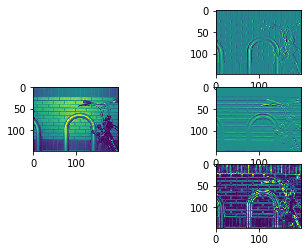

In [36]:
%matplotlib inline
# Note: DO NOT USE THE SCIPY INBUILT FUNCTION. CONVOLVE USING FILTERS AND NORMALIZE
import scipy
import imageio
import matplotlib.pyplot as plt
import numpy as np

im = imageio.imread('./fig01.jpg').astype("int32")
grey_img = None #convert image to greyscale 

grey_shape = list(im.shape)
grey_shape[-1] = 1
grey_shape = tuple(grey_shape)

#assert grey_img.shape == grey_shape
ax1 = plt.subplot(323)
ax2 = plt.subplot(322)
ax3 = plt.subplot(324)
ax4 = plt.subplot(326)

## Initializing the sobel filter
filterx = np.array([[3, 0 ,-3],
                      [10 , 0 , -10],
                      [3, 0 ,-3]])
filtery = filterx.T

## Fill the code below

def Convolate(ker , img , a , b) :
    return np.sum([np.multiply(ker,img[a-1:a+2,b-1:b+2])])

dx = np.zeros((im.shape[0] - 2 , im.shape[1] - 2))
dy = np.zeros((im.shape[0] - 2 , im.shape[1] - 2))
for i in range(1 , im.shape[0] - 1) :
    for j in range(1 , im.shape[1] - 1) :
        dx[i - 1][j - 1] = Convolate(filterx , im , i , j)
        dy[i - 1][j - 1] = Convolate(filtery , im , i , j)

def scalingWithoutFor(arr) :
    brr = np.empty_like(arr, dtype = np.float64)
    minimum = arr.min(axis=1).reshape(len(arr),1)
    maximum = arr.max(axis=1).reshape(len(arr),1)
    brr = (arr - minimum)/(maximum - minimum)
    return brr

mag =  np.sqrt(dx ** 2 + dy ** 2)
normalized = scalingWithoutFor(mag) 

## End
## Plot it
ax1.imshow(im)
ax2.imshow(dx)
ax3.imshow(dy)
ax4.imshow(normalized)
plt.show()

# All Done?
## Checkout these advanced guides

### [Advanced Numpy](https://scipy-lectures.org/advanced/advanced_numpy/index.html)
### [Image Processing](https://scipy-lectures.org/advanced/image_processing/index.html)